In [2]:
import sys
!{sys.executable} -m pip install graphviz

     |████████████████████████████████| 46 kB 1.5 MB/s eta 0:00:01


In [3]:
import graphviz

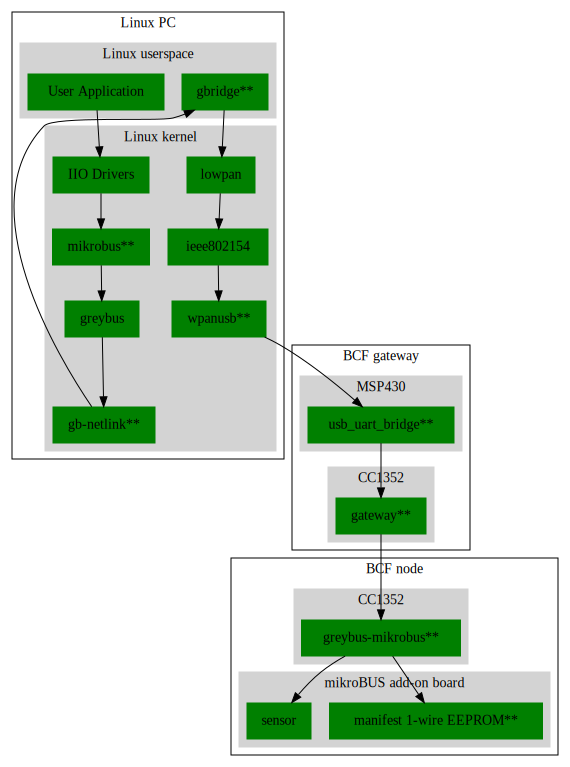

In [101]:
dot = graphviz.Digraph('S',comment="Software architecture")
dot.attr('node', shape='box',color='white')
with dot.subgraph(name='cluster_0') as x:
    x.attr(color='black',label='Linux PC')
    with x.subgraph(name='cluster_1') as c:
        c.attr(style='filled',color='lightgrey',label='Linux userspace')
        c.node_attr.update(style='filled',color='green')
        c.node('A',label='User Application',tooltip='Primary developer entry point')
        c.node('g',label='gbridge**',tooltip='Bridge Greybus to networked devices')
    with x.subgraph(name='cluster_2') as c:
        c.attr(style='filled',color='lightgrey',label='Linux kernel')
        c.node_attr.update(style='filled',color='green')
        c.node('I',label='IIO Drivers',tooltip='Hundreds of drivers for sensors and acutators')
        c.node('r',label='greybus',tooltip='Dynamic RPC-like bus interface for I2C, SPI, UART, etc.')
        c.node('n',label='gb-netlink**',tooltip='Extend Greybus over netlink to userspace')
        c.node('m',label='mikrobus**',tooltip='Board-level abstraction to identify sensor connections')
        c.node('w',label='wpanusb**',tooltip='USB-interface to IEEE802.15.4 radio')
        c.node('i',label='ieee802154',tooltip='Standards-based radio interface')
        c.node('6',label='lowpan',tooltip='IPv6 for low-power wireless networks')
with dot.subgraph(name='cluster_3') as x:
    x.attr(color='black',label='BCF gateway')
    with x.subgraph(name='cluster_4') as c:
        c.attr(style='filled',color='lightgrey',label='CC1352')
        c.node_attr.update(style='filled',color='green')
        c.node('z',label='gateway**',tooltip='Zephyr-based IEEE802.15.4 radio accepting HDLC over UART transactions')
    with x.subgraph(name='cluster_5') as c:
        c.attr(style='filled',color='lightgrey',label='MSP430')
        c.node_attr.update(style='filled',color='green')
        c.node('b',label='usb_uart_bridge**',tooltip='USB interace to access CC1352 UART that encapulates WPANUSB in HDLC')
with dot.subgraph(name='cluster_6') as x:
    x.attr(color='black',label='BCF node')
    with x.subgraph(name='cluster_7') as c:
        c.attr(style='filled',color='lightgrey',label='CC1352')
        c.node_attr.update(style='filled',color='green')
        c.node('k',label='greybus-mikrobus**',tooltip='Zephyr-based applies Greybus transactions from IPv6/IEEE802154 to physical I2C, SPI, UART, etc.')
    with x.subgraph(name='cluster_8') as c:
        c.attr(style='filled',color='lightgrey',label='mikroBUS add-on board')
        c.node_attr.update(style='filled',color='green')
        c.node('e',label='manifest 1-wire EEPROM**',tooltip='Manifest for mikroBUS driver')
        c.node('s',label='sensor',tooltip='Over 1,000 different sensor, actuator and indicator options')
dot.edges(['AI','Im','mr','rn','ng','g6','6i','iw','wb','bz','zk','ks','ke'])
dot

In [102]:
dot.render('bcf_block_diagram',format='svg')

'bcf_block_diagram.svg'